## EXERCISE: Seismic – an array of numbers

The numpy array object

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

----
**Exercise**:

This exercise requires the file called `seismic_cube.txt` (120 MB). [Download it](https://dl.dropboxusercontent.com/u/14927133/seismic_cube.txt) and place it in your data folder,  

a) Use `np.loadtxt(...)` to load the text file named `data/seismic_cube.txt` into an numpy array called `data`

b) How many dimensions does this `data` array have?

c) How many elements does `data` have in each dimension (`np.shape`)?

d) How much space does this object take up in memory?

e) How much time did it take? (seconds) (`import time`)

In [6]:
import time
start = time.time()
 
data = np.loadtxt('data/seismic_cube.txt')
 
end = time.time()
elapsed = end - start
print("Time taken to read volume: {:.2f} seconds.".format(elapsed))

Time taken to read volume: 28.64 seconds.


Some information about the seismic cube:

- Number of inlines: `194`

- Number of crosslines: `299`

- Number of samples per trace: `463`

- Sample rate in seconds: `0.004`

_I'm giving you this information, but in practice, this would probably come from the file's header or meta-data section_

In [4]:
nIL = 194  # number of inlines
nXL = 299  # number of crosslines
nt = 463   # number of samples per trace
dt = 0.004 # sample rate in seconds

----
**Exercise**: Use numpy's reshape function to turn this this array into a 3D array. Print the `shape` attribute of the reshaped object to verify that this object has the correct number of inlines and crosslines

In [ ]:
# enter your code here


----
**Exercise**: Get rid of some bad data for the last few samples on each trace; take the first 450 samples (of the last dimension)

In [8]:
# enter your code here


----
**Exercise**: create a new object called `xline` find the middle trace on crossline 150

- What are the dimensions of `xline`
- Make a plot of `xline` using plt.imshow(xline)
- Pass an argument into the `imshow` function change the ugly default to your [favourite colourbar](http://matplotlib.org/examples/color/colormaps_reference.html)! 
- Is there anything funny / wrong / interesting about the line? Can you fix it?
- Use matplotlib.pyplot's `figure` function to make a figure object, `fig`

![Crossline149](images/Crossline149.png)

----
**Exercise**: grab the trace in the middel of `xline` to answer the following questions

a) How many time samples are in this trace?

b) What is the range of peak to peak values of the trace?

c) what is the maximum value along this trace? And where is it located?

d) what is the minumum value along this trace? And where is it located?

e) Seismic traces should have a mean value close to zero. Does this trace have  seismic trace that is close to zero? 

In [30]:
s = xline[int(line.shape[0]/2),...]
s.shape

(450,)

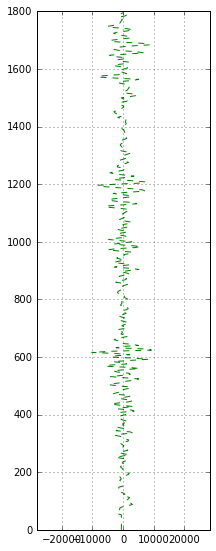

In [31]:
%matplotlib inline
t = np.arange(0, 450 * 4, 4)
a = 12
#
fig = plt.figure(figsize=(3,9), facecolor='w')
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(s,t, 'g--')
ax.set_xlim(-a*s.std(), a*s.std())
ax.grid()

fig.savefig('dotted_green.png', dpi=300)

#plt.plot(s, t) #, 'g*', lw=2.0, alpha=0.25)
#plt.xlim(-2.0*s.std(), 2.0*s.std())

----
**Exercise**: Plot this seismic trace (vertically!)
    
    - make a "time axis": `np.arange(first_sample, last_sample, sample_rate)
    
    - use matplotlib's `plt.plot` function (documentation!)
    
    - other `plt` functions to check out: `plt.xlim`, `plt.title`, `plt.ylabel`, `plt.invert_yaxis()`, 'plt.grid`

# Trace statistics

----
**Exercise**: use the `plt.hist(s, bins)` function to create a histogram with 100 bins

As suspected, most of the data values are close to zero, and fan outward (more or less symmetrically) to larger positive and negative values.

To be sure, we can include the values from the entire line to build up better statitics. However, in order to pass a 2D array to the <code>plt.hist</code> function, we have to unravel it first,

## Trace Bandwidth

Let's look at the frequency content of this trace. To do this we will need to use the the fast fourier transform function from the Scipy FFT module. It helps to know that the sample rate of the trace is 0.04 s

In [32]:
from scipy import fft
S = abs(fft(s))
power = 20*np.log10(a)
faxis = np.fft.fftfreq( len(power), d = dt)

----
**Exercise**: Plot the power spectrum (frequency on the time axis). For bonus points, plot it on a log base 10 scale (Decibel)

----
**Exercise**: write a loop to plot the power spectrum all the traces

## Plot the entire line

Exercise: plot the 2D line (any 2D matrix can be shown as an image)
    
`plt.imshow(...)`